# <center> Assignment 1</center>
<right><b>Bhumi Patel (B00824756)</b></right>



In [37]:
import glob
import xml.etree.ElementTree as ET
import pandas as pd
from pprint import pprint
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from pprint import pprint
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# getlist of all files in all folders
def getListofFileFunction():
    
    filelist=[];
    for i in range(10,31):
        filename="199703"+str(i)+"/*.xml";
        files=glob.glob(filename);
        filelist.append(files); 
        
    return filelist
 
fileList=getListofFileFunction();    

In [38]:
# function to get dataframe from xml files 
def XmlToDataframeFunction(fileList,dfColumnList):
    

    xml_df = pd.DataFrame(columns=dfColumnList);
    
    for folder in fileList:
        
        for i in folder:
            
            fileName= i.split("/",1)[1];
            root = ET.parse(i).getroot();
            date=""
            itemId=root.get('itemid');
            headline=root.find("headline").text
            text_array=root.find("text")
            
            text=""
            for i in text_array:
                text=text+i.text;

            meta_data=root.find("metadata");
            
            topics=[];
            for i in meta_data:
                if i.get("class")=="bip:topics:1.0":
                    for j in i:
                        topics.append(j.get('code'));
                if i.get("element")=="dc.date.published":
                    date=i.get('value');

            xml_df = xml_df.append(
                        pd.Series([itemId,headline,text,topics,date,fileName], index=dfColumnList),
                        ignore_index=True)

    return xml_df;

# list of column in dataframe
dfcols = ['itemId', 'headline', 'text','topics','date','fileName'];
xml_df=XmlToDataframeFunction(fileList,dfcols)
pprint(xml_df.shape);

(46423, 6)


In [40]:
print(xml_df);

       itemId                                           headline  \
0      431661  RTRS-Australia base metal producer prices - Ma...   
1      431382         SocGen ups TF1 to outperform from neutral.   
2      431457  Dutch money market in suspense over possible h...   
3      431985                 Iran joins Islamic insurance body.   
4      431727  FOCUS - Japan finalises laws aimed at MOF's po...   
...       ...                                                ...   
46418  475604  Curfew in northwest Cameroon, gunmen kill gend...   
46419  475610           Gunmen target Cameroon forces, kill two.   
46420  475756          EgyptAir takes Libyan pilgrims to Jeddah.   
46421  475560   SOCCER-TUNISIA FIRST DIVISION RESULTS/STANDINGS.   
46422  475801     Israeli-Arab tensions mar Easter in Jerusalem.   

                                                    text  \
0      Australian base metal producer prices:\t\t\t\t...   
1      Societe Generale raised its recommendation for...   
2  

### Bip Topics 
- There are 101 different news type in dataset.
- Removed rows which does not contain any Biptopics.

In [41]:
df=xml_df.copy()

#Remove rows which does not contain any news topics.
df=df[df['topics'].map(lambda d: len(d)) > 0]

# function to get unique news topic.
def getBipTopicsList(df_topics):
    
    topics_value=[];
    for i in df_topics:
        for j in i:
            topics_value.append(j);

    unique_topic_value=set(topics_value);
    return list(unique_topic_value)

topics_list=getBipTopicsList(xml_df["topics"])
print(topics_list)
print("no of unique news type",len(topics_list));

['E512', 'G151', 'M132', 'C183', 'GREL', 'GFAS', 'GODD', 'G156', 'M12', 'E14', 'E411', 'C13', 'GTOUR', 'M13', 'M14', 'E141', 'GSPO', 'ECAT', 'GHEA', 'E211', 'C22', 'C32', 'C24', 'E31', 'GCRIM', 'E212', 'E513', 'GENT', 'M131', 'GJOB', 'E21', 'G158', 'C181', 'C18', 'C174', 'E71', 'GDIP', 'C14', 'C313', 'G15', 'E132', 'G155', 'C331', 'GPRO', 'E142', 'GENV', 'C31', 'GVOTE', 'E11', 'GPOL', 'CCAT', 'G153', 'GDEF', 'E13', 'C21', 'C23', 'C172', 'C34', 'E143', 'C182', 'C411', 'E61', 'E313', 'GOBIT', 'M11', 'C173', 'E511', 'C15', 'E41', 'GSCI', 'C33', 'G157', 'M143', 'GWEA', 'C312', 'GDIS', 'C12', 'E51', 'G154', 'GCAT', 'C311', 'GWELF', 'C17', 'C171', 'G152', 'E311', 'M142', 'C11', 'M141', 'C152', 'E12', 'GVIO', 'C41', 'C16', 'MCAT', 'C1511', 'E121', 'E131', 'C151', 'E312', 'C42']
no of unique news type 101


### Stop words remove:
- Removed stop words using NLTK library.
- perform words steamming 


In [43]:
#function to remove stopwords and perform stemming on words. 
def removeStopWord(df_text):
    
    stemmer = PorterStemmer()
    stop_words=set(stopwords.words("english"))
    cleaned_text=[]

    for data in df_text:
        tokenized_word=word_tokenize(data)
        temp_wordlist=[]

        for w in tokenized_word:

            #check if word is stop_words and alphabetic words 
             if w.lower() not in stop_words and w.isalpha():
                    
                #Stem the words
                word_Final = stemmer.stem(w)
                temp_wordlist.append(word_Final)

        temp=' '.join(temp_wordlist)
        cleaned_text.append(temp)
        
    return cleaned_text

cleaned_text=removeStopWord(df['text'])
df['text']=list(cleaned_text);

In [44]:
print(df['text']);

0        australian base metal produc price per tonn co...
1        societ general rais recommend share privat fre...
2        trade dutch money market quiet monday morn mar...
3        iran join islam corpor insur invest export cre...
4        japan monday finalis bill aim trim mighti fina...
                               ...                        
46418    governor cameroon volatil provinc sunday decla...
46419    unidentifi gunmen kill least two paramilitari ...
46420    first egyptair flight carri libyan saudi arabi...
46421    result tunisian firstdivis soccer match play w...
46422    hundr pilgrim easter sunday pray jerusalem sit...
Name: text, Length: 46308, dtype: object


## Feature Extraction 
- I extract text feature using TfidfVector
- I took first bip topics from documnets' list of bip-topics
- I perform label encoding on Labels data which converts string data to numaric data.
- I took 10000 data from whole dataset to perform classification model due to hight execution time in model training and model tunning.

In [45]:
#get lables value, I took just first news topic from list of topics in one document.
def getlableColumn(df_topics):
    
    topic_list=[];

    for i in df_topics:
        if len(i)!=0:
            topic_list.append(i[0]);
        else:
            topic_list.append("");
    
    lbl_list=LabelEncoder()
    lbl_list.fit(topics_list);
    topic_list=lbl_list.transform(topic_list)
    
    return topic_list
 
#function to get dataframe which contain feature and lable.
#Feature=perform TfidfVectorizer to extract feature from text 

def getFeatureAndLable(df):
    
    cleaned_text=df['text']
    df_topics=df['topics']
    df_new = pd.DataFrame()
    vectorizer = TfidfVectorizer()
    words_tfIdf = vectorizer.fit_transform(cleaned_text)
    df_new['features'] = list(words_tfIdf);
    df_new['labels']=getlableColumn(df_topics);
    return words_tfIdf,df_new

df_model=df[:10000]
words_tfIdf,df_new=getFeatureAndLable(df_model)
print(df_new);
print(words_tfIdf);

                                               features  labels
0       (0, 21932)\t0.056011322317093104\n  (0, 3153...      96
1       (0, 23733)\t0.13967124510306675\n  (0, 9464)...       4
2       (0, 10998)\t0.045211422803396774\n  (0, 1201...      93
3       (0, 2528)\t0.10733212771373776\n  (0, 10596)...       2
4       (0, 15084)\t0.05700991945708145\n  (0, 32833...       2
...                                                 ...     ...
9995    (0, 1705)\t0.20164007794960054\n  (0, 231)\t...      35
9996    (0, 4976)\t0.16110822626407223\n  (0, 16631)...      96
9997    (0, 23456)\t0.11064385262493953\n  (0, 34882...       4
9998    (0, 3603)\t0.21281129354295159\n  (0, 19282)...       4
9999    (0, 26263)\t0.3688438615531311\n  (0, 5189)\...       9

[10000 rows x 2 columns]
  (0, 21932)	0.056011322317093104
  (0, 31534)	0.1360368192100831
  (0, 18605)	0.17769005526330656
  (0, 34186)	0.10416676655157624
  (0, 36324)	0.179682640723308
  (0, 24585)	0.23195226347281497
  (0, 2499

## Divide your data into a training and test set

Methods available :
 1. Hold-out
 2. Cross validation 
 
 ### Hold-out :
- In hold-out method, Data is split into train and test. Train data will be used to train model.Test data is unseen data for model, it will be used to check performance of model.
- This method is good for large number of dataset because it does not use every single dataset to train the model.If the size of the dataset is crucial then cross-validation works better.

 ### Cross validation :
- In Cross-validation method, Data is split in to K groups.Each time 1/K of the data is used for evalution.
- In this method, Data is used very efficiently because every data is used to train model.But for large dataset it will take higher time.Cross validation is computationally expensive.

 
#### I used Hold-Out method to split my data into training and testset.
- I have 10000 dataset, which is very high. Cross validation takes very high time in computation with large dataset.On other hand Hold-out method is good to use when we have large amount of dataset.

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import svm


#split the Data
Train_X, Test_X, Train_Y, Test_Y =train_test_split(words_tfIdf,df_new['labels'],test_size=0.3)


## classifier evaluation metrics: 
- <b> I used F-score with average='micro'</b>
- F-sore :  F1 score is a weighted average of the precision and recall,It works better when data has uneven class distribution.

   - Precision gives ration of correctly predicted positive observations to the total predicted positive observations
   - Recall gives the ratio of correctly predicted positive observations to the all observations.

- Given problem is multiclass classification.There are different 101 news categories.
- Given Data has Imbalanced Dataset.F-score with micro average is a useful evalution metrics when the classes are very imbalanced.(Some of the class has very high instances compare to others)
- As shown in histogram of labels,The frequency of classes are very imbalanced


    

(array([3282.,  777.,  645.,  688.,  509.,  269.,   75., 1795.,    6.,
        1954.]),
 array([ 0. ,  9.8, 19.6, 29.4, 39.2, 49. , 58.8, 68.6, 78.4, 88.2, 98. ]),
 <a list of 10 Patch objects>)

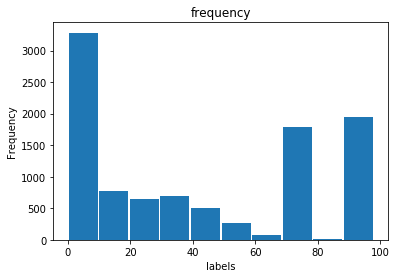

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

#plot votes frequency
labels=df_new['labels']
plt.xlabel('labels')
plt.ylabel('Frequency')
plt.title('frequency')
plt.hist(labels,rwidth=0.95)

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#function to get trained model 
def getTrainedClassfier(model,Train_X,Train_Y):
    model=model.fit(Train_X, Train_Y)
    return model

#function to get model accuracy
def getModelAccuracy(model,Test_X,Test_Y):
    predition = model.predict(Test_X)
    accuracy=accuracy_score(Test_Y, predition)
    f_score=f1_score(Test_Y, predition, average='micro')  
    print("Accuracy of model",accuracy);
    print("F-score of model",f_score);
    return accuracy

### MultinomialNB

In [55]:
from sklearn.naive_bayes import MultinomialNB

NB_model = MultinomialNB();
NB_model=getTrainedClassfier(NB_model,Train_X,Train_Y)
Accuracy=getModelAccuracy(NB_model,Test_X,Test_Y)

Accuracy of model 0.4656666666666667
F-score of model 0.4656666666666667


### SVM model 

In [50]:
from sklearn import svm

svm_model =svm.SVC(kernel="linear",gamma='auto')
svm_model=getTrainedClassfier(svm_model,Train_X,Train_Y)
Accuracy=getModelAccuracy(svm_model,Test_X,Test_Y)



Accuracy of model 0.7676666666666667
F-score of model 0.7676666666666666


### RandomForest

In [49]:
from sklearn.ensemble import RandomForestClassifier


randomForest_model = RandomForestClassifier(n_estimators=100,random_state=0)
randomForest_model=getTrainedClassfier(randomForest_model,Train_X,Train_Y)
Accuracy=getModelAccuracy(randomForest_model,Test_X,Test_Y)
 

Accuracy of model 0.6613333333333333
F-score of model 0.6613333333333333


### DecisionTreeClassifier

In [70]:
from sklearn.tree import DecisionTreeClassifier

decisionTreeModel = DecisionTreeClassifier()
decisionTreeModel=getTrainedClassfier(decisionTreeModel,Train_X,Train_Y)
Accuracy=getModelAccuracy(decisionTreeModel,Test_X,Test_Y)


Accuracy of model 0.5793333333333334
F-score of model 0.5793333333333334


### Neural network

In [56]:
from sklearn.neural_network import MLPClassifier
mlpClassifier_model = MLPClassifier(max_iter=400) 
mlpClassifier_model=getTrainedClassfier(mlpClassifier_model,Train_X,Train_Y)
Accuracy=getModelAccuracy(mlpClassifier_model,Test_X,Test_Y)


Accuracy of model 0.7583333333333333
F-score of model 0.7583333333333333


### Linear Regression

Linear Regression is not suitable for classification problem.
1. In linear Regression predicted value is continuous,where in classification problem predicted value is categorical
2. In linear Regression model, It try to find relation between features and lables data.There is linear relationship between x and y.

 - As per the predicted values and coefficient, In prediction it gives continuous value rather than categorical value.Linear regression model is not efficient for given problem.

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(Train_X, Train_Y)
model.coef_
predition = model.predict(Test_X)
print("coefficient value",model.coef_);
print("predicted value",predition);


coefficient value [101.06188535 -13.88952026 -80.66125794 ... 492.61543982  -6.21142736
   0.        ]
predicted value [ 23.15603174 311.88208368  -1.17695365 ...  19.77456796 -91.37285922
 -37.81724754]


In [57]:
def tuneClassifierFunction(model,param_grid):
    grid_searchCV = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5)
    grid_searchCV=grid_searchCV.fit(Train_X, Train_Y)
    return grid_searchCV

def accuracyFunction(grid_searchCV):
    print("best parameteres",grid_searchCV.best_params_)
    y_predict=grid_searchCV.predict(Test_X)
    accuracy=accuracy_score(Test_Y, y_predict)
    f_score=f1_score(Test_Y, y_predict, average='micro')  
    print("F-score of model",f_score);
    print("Accuracy of model",accuracy)

### Random forest model Tunning 

In [61]:
from sklearn.model_selection import GridSearchCV
min_samples_leaf = [1,2,3]
n_estimators=[1000,500]
param_grid = {'min_samples_leaf': min_samples_leaf,'n_estimators': n_estimators}

grid_searchCV=tuneClassifierFunction(randomForest_model,param_grid);
accuracyFunction(grid_searchCV);

/Users/bhumipatel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


best parameteres {'min_samples_leaf': 1, 'n_estimators': 1000}
F-score of model 0.6723333333333333
Accuracy of model 0.6723333333333333


### SVM model Tunning 

In [64]:
# type of kernel value
kernel=['linear','poly','rbf','sigmoid']
gammas = [0.001, 0.01]
param_grid = {'kernel': kernel,'gamma': gammas}
grid_searchCV=tuneClassifierFunction(svm_model,param_grid);
accuracyFunction(grid_searchCV);

/Users/bhumipatel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


best parameteres {'gamma': 0.001, 'kernel': 'linear'}
F-score of model 0.7676666666666666
Accuracy of model 0.7676666666666667


### DecisionTree model Tunning 

In [69]:
criterion=['gini','entropy']
max_depth = [50,51]
min_samples_split=[2,3,4]
param_grid = {'criterion': criterion,'max_depth': max_depth,'min_samples_split':min_samples_split}
grid_searchCV=tuneClassifierFunction(decisionTreeModel,param_grid); 
accuracyFunction(grid_searchCV);

/Users/bhumipatel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


best parameteres {'criterion': 'gini', 'max_depth': 50, 'min_samples_split': 2}
F-score of model 0.5843333333333334
Accuracy of model 0.5843333333333334


### Nural network model Tunning 

In [ ]:
max_iter=[400,600]
solver= ['lbfgs','adam']
hidden_layer_sizes=[100,200]

param_grid = {'max_iter': max_iter,'solver': solver,'hidden_layer_sizes':hidden_layer_sizes}
grid_searchCV=tuneClassifierFunction(mlpClassifier_model,param_grid)
accuracyFunction(grid_searchCV);

### Model comparison : 
SVM and Neural Network both have good performance on given problem.

 <b>Model Performance :</b>

-  Navie bayer = 0.4656666666666667
-  SVM = 0.7676666666666667
-  Random forest= 0.6613333333333333
-  Decision tree= 0.5793333333333334
-  nural network= 0.7583333333333333

<b> SVM is best classifier for this text classification Problem.</b>

1. SVM works efficiently even with many features because SVMs use overfitting protection, In text classification there are many features.
2. SVM has ability to learn dimensionality of feature space independently.
3. In text classification,each document contains few values which is not zero.SVM is suitable for dense concept problem.
4. SVM Eliminate the feature selection which makes text classification easy.
5. SVM gives higher accuracy without parameters tuning and it is faster compare to Neural network for this problem. 
6. SVM doen not need more training data to providing accurate results.It takes higher computation time compare to naive_bayes but give higher accuracy. 
7. SVM gave highest accuracy in given problem compare to other models.



#### Reference
1. https://www.cs.cornell.edu/people/tj/publications/joachims_98a.pdf
2. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
3. https://scikit-learn.org/stable/modules/grid_search.html
4. https://scikit-learn.org/stable/modules/neural_networks_supervised.html
5. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
6. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
7. https://scikit-learn.org/stable/modules/svm.html
8. https://scikit-learn.org/stable/modules/model_evaluation.html